In [199]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

# 2)

In [200]:
X = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 3],
  [1, 3, 3]
])

Z = np.array([1.4, 0.5, 2, 2.5]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=2)
bmatrix(Z, nameof(Z), exercise=2)

In [201]:
W = np.linalg.inv(X.T @ X) @ X.T @ Z

bmatrix(W, nameof(W), exercise=2)

In [202]:
x_new = np.array([[1, 2, 3]]).T
bmatrix(x_new, nameof(x_new), exercise=2)
print(x_new)
z_hat = W.T @ x_new
print(f"Prediction: {z_hat}")

[[1]
 [2]
 [3]]
Prediction: [[2.25]]


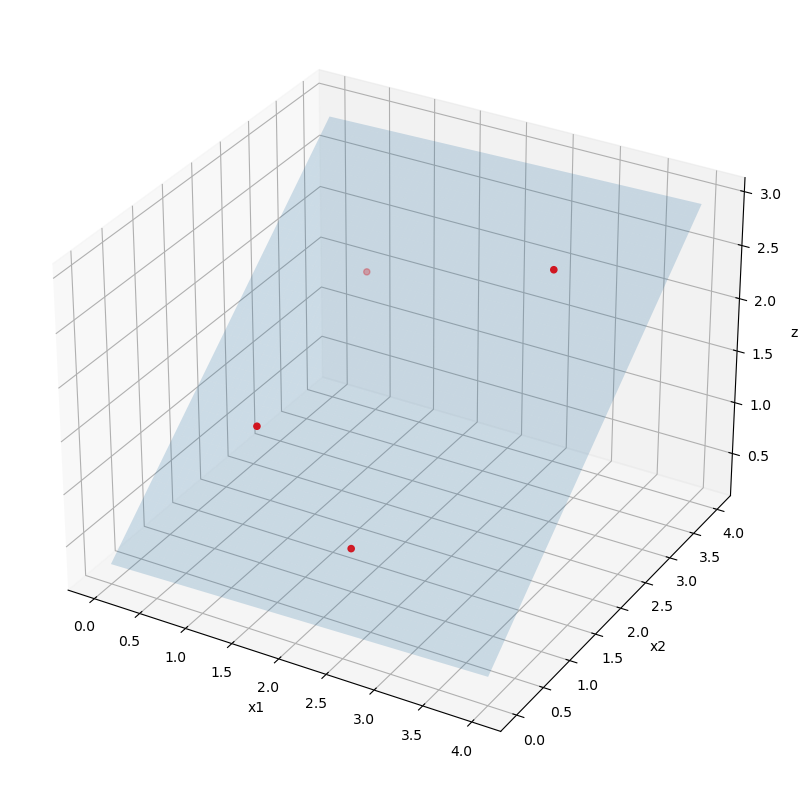

In [203]:
# Plot the linear regression's 3d hyperplane

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 1], X[:, 2], Z, c='r', marker='o')

# Plot the hyperplane
x1 = np.linspace(0, 4, 100)
x2 = np.linspace(0, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
z = W[1] * x1 + W[2] * x2 + W[0]
ax.plot_surface(x1, x2, z, alpha=0.2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

# save the figure as an SVG
plt.savefig('./assets/ex-2/3d-hyperplane.svg', format='svg')
plt.show()

In [204]:
# gather the original samples' estimated values
estimates = X @ W
print(estimates)
bmatrix(estimates, nameof(estimates), exercise=2)

[[0.94]
 [0.96]
 [2.23]
 [2.27]]


In [205]:
mse = np.mean((estimates - Z) ** 2)
print(f"MSE: {mse}")
mae = np.mean(np.abs(estimates - Z))
print(f"MAE: {mae}")

MSE: 0.13224999999999998
MAE: 0.345


In [206]:
LAMBDA = 0.2
W_ridge = np.linalg.inv(X.T @ X + LAMBDA * np.eye(3)) @ X.T @ Z
bmatrix(W_ridge, nameof(W_ridge), exercise=2)

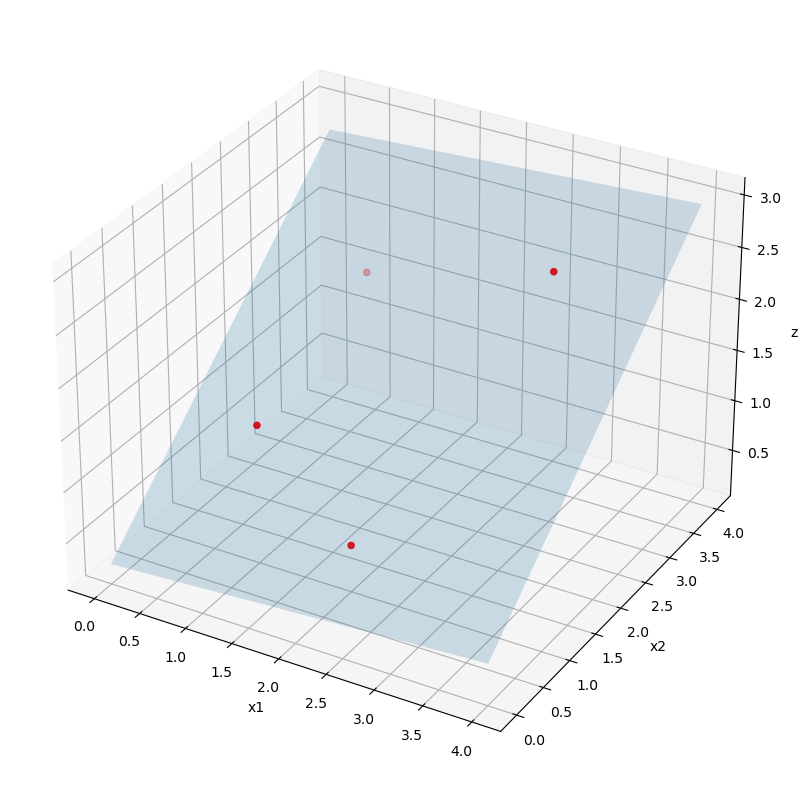

In [207]:
# Plot the ridge regression's 3d hyperplane

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 1], X[:, 2], Z, c='r', marker='o')

# Plot the hyperplane
x1 = np.linspace(0, 4, 100)
x2 = np.linspace(0, 4, 100)
x1, x2 = np.meshgrid(x1, x2)
z = W_ridge[1] * x1 + W_ridge[2] * x2 + W_ridge[0]
ax.plot_surface(x1, x2, z, alpha=0.2)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

# save the figure as an SVG
plt.savefig('./assets/ex-2/3d-hyperplane-ridge.svg', format='svg')
plt.show()

In [208]:
# get the norm of the vectors describing the hyperplanes for linear and ridge regression
norm_linear = np.linalg.norm(W)
norm_ridge = np.linalg.norm(W_ridge)
print(f"Norm of the linear regression's hyperplane: {norm_linear}")
print(f"Norm of the ridge regression's hyperplane: {norm_ridge}")

Norm of the linear regression's hyperplane: 0.7014627573863063
Norm of the ridge regression's hyperplane: 0.674861908636186


# 3)

In [209]:
X = np.array([
  [1, 1, 1],
  [1, 2, 1],
  [1, 1, 3],
  [1, 3, 3]
])

Z = np.array([1, 1, 0, 0]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=3)
bmatrix(Z, nameof(Z), exercise=3)

In [210]:
W = np.linalg.inv(X.T @ X) @ X.T @ Z

bmatrix(W, nameof(W), exercise=3)

In [211]:
OUTPUT_THRESHOLD = 0.5
x_new = np.array([[1, 2, 2.5]]).T

bmatrix(x_new, nameof(x_new), exercise=3)

z_hat = W.T @ x_new
print(f"Estimation: {z_hat}")
print(f"Prediction: {1 if z_hat[0][0] > OUTPUT_THRESHOLD else 0}")

Estimation: [[0.25]]
Prediction: 0


# 4)

In [224]:
X = np.array([
  [1, 3, -1],
  [1, 4, 2],
  [1, 2, 2],
])

Z = np.array([2, 1, 1]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=4)
bmatrix(Z, nameof(Z), exercise=4)

W_1 = np.linalg.inv(X.T @ X) @ X.T @ Z

bmatrix(W_1, nameof(W_1), exercise=4)

Sigma = np.array([
  [0.2, 0],
  [0, 0.2]
])

TAU = 0.1

W_2 = np.linalg.inv(X.T @ X + ((TAU / Sigma[0][0]) ** 2) * np.eye(3)) @ X.T @ Z

bmatrix(W_2, nameof(W_2), exercise=4)

# 5)

In [213]:
X = np.array([
  [-0.95, 0.62],  
  [0.63 , 0.31],
  [-0.12, -0.21],
  [-0.24, -0.5],
  [0.07 , -0.42],
  [0.03 , 0.91],
  [0.05 , 0.09],
  [-0.83, 0.22],
])

LABELS = np.array([0, 0, 1, 0, 1, 0, 1, 0]).reshape(-1, 1)

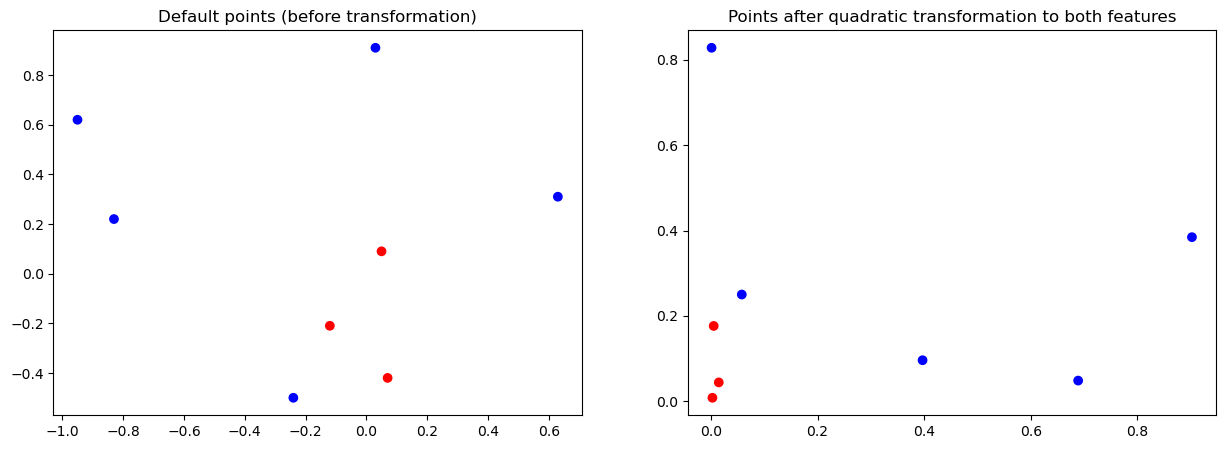

In [214]:
# plot the data points, side by side with the default points and after applying a quadratic transformation to the features

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# plot the default points
axes[0].scatter(X[:, 0], X[:, 1], c=LABELS, cmap='bwr')
axes[0].set_title('Default points (before transformation)')

# plot the points after applying a quadratic transformation to the features
X_quadratic = np.array([
  [x[0] ** 2, x[1] ** 2, x[0] * x[1]] for x in X
])
axes[1].scatter(X_quadratic[:, 0], X_quadratic[:, 1], c=LABELS, cmap='bwr')
axes[1].set_title('Points after quadratic transformation to both features')

plt.savefig('./assets/ex-5/points.png',)
plt.show()

In [215]:
# considering the transformation as Phi:

Phi = np.array([
  [1, x[0]**2, x[1]**2] for x in X
])

bmatrix(Phi, nameof(Phi), exercise=5)

In [216]:
W = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ LABELS

bmatrix(W, nameof(W), exercise=5)

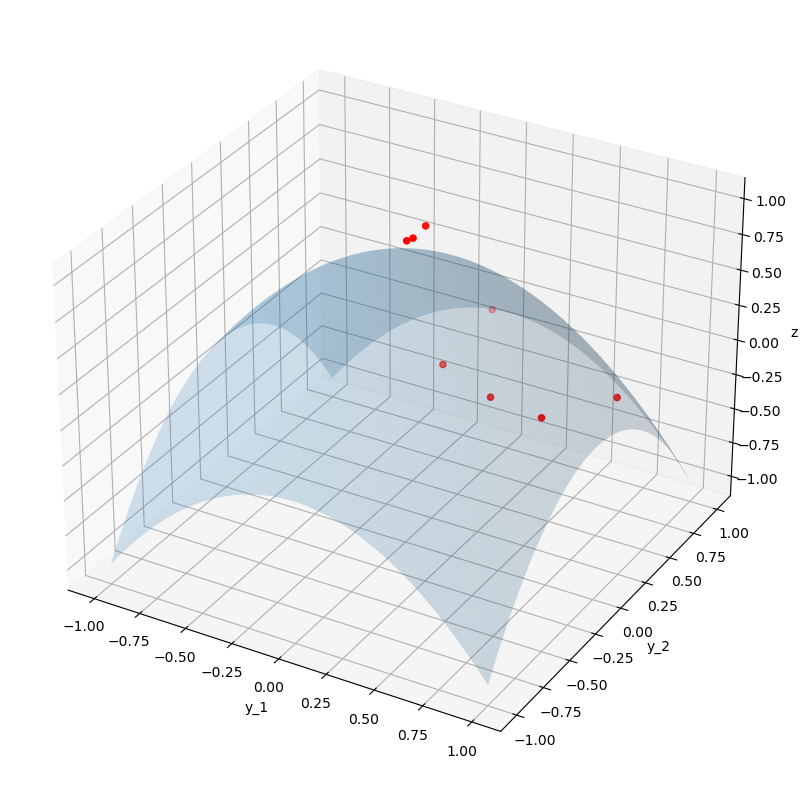

In [217]:
# Plot the paraboloid + the points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_quadratic[:, 0], X_quadratic[:, 1], LABELS, c='r', marker='o')

# Plot the paraboloid
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
z = W[0] + W[1] * x1 ** 2 + W[2] * x2 ** 2
ax.plot_surface(x1, x2, z, alpha=0.2)

ax.set_xlabel('y_1')
ax.set_ylabel('y_2')
ax.set_zlabel('z')


plt.savefig('./assets/ex-5/paraboloid.svg', format='svg')
plt.show()

# 6)

In [218]:
X = np.array([3, 4, 6, 10, 12]).reshape(-1, 1)
Z = np.array([1.5, 9.3, 23.4, 45.8, 60.1]).reshape(-1, 1)

bmatrix(X, nameof(X), exercise=6)
bmatrix(Z, nameof(Z), exercise=6)

# Phi_1 will be the result of a logarithmic transformation to the features,
# Phi_2 will be the result of a quadratic transformation to the features

Phi_1 = np.array([
  [1, np.log(x[0])] for x in X
])

Phi_2 = np.array([
  [1, x[0]**2] for x in X
])

bmatrix(Phi_1, nameof(Phi_1), exercise=6)
bmatrix(Phi_2, nameof(Phi_2), exercise=6)

In [219]:
W_1 = np.linalg.inv(Phi_1.T @ Phi_1) @ Phi_1.T @ Z
W_2 = np.linalg.inv(Phi_2.T @ Phi_2) @ Phi_2.T @ Z

bmatrix(W_1, nameof(W_1), exercise=6)
bmatrix(W_2, nameof(W_2), exercise=6)

/tmp/ipykernel_7123/2955700383.py:10: RuntimeWarning: divide by zero encountered in log
  y = W_1[1] * np.log(x) + W_1[0]


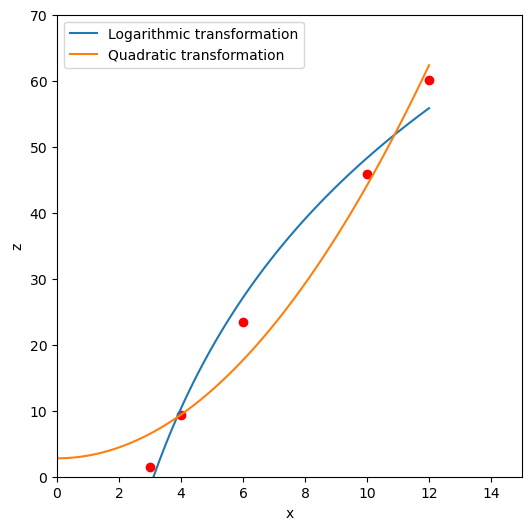

In [220]:
# plot both linear regressions, and the original data points

fig, ax = plt.subplots(figsize=(6, 6))

# plot the original data points
ax.scatter(X, Z, c='r', marker='o')

# plot the linear regression with logarithmic transformation
x = np.linspace(0, 12, 100)
y = W_1[1] * np.log(x) + W_1[0]
ax.plot(x, y, label='Logarithmic transformation')

# plot the linear regression with quadratic transformation
x = np.linspace(0, 12, 100)
y = W_2[1] * x**2 + W_2[0]
ax.plot(x, y, label='Quadratic transformation')

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(0, 15)
ax.set_ylim(0, 70)
ax.legend()

plt.savefig('./assets/ex-6/linear-regressions.png')
plt.show()

In [221]:
# compute the SSE for both linear regressions

z_hat_1 = Phi_1 @ W_1
z_hat_2 = Phi_2 @ W_2

print(z_hat_1)
print(z_hat_2)

bmatrix(z_hat_1, nameof(z_hat_1), exercise=6)
bmatrix(z_hat_2, nameof(z_hat_2), exercise=6)

SSE_1 = np.sum((Z - z_hat_1)**2)
SSE_2 = np.sum((Z - z_hat_2)**2)

print(f"SSE for the linear regression with logarithmic transformation: {SSE_1}")
print(f"SSE for the linear regression with quadratic transformation: {SSE_2}")

[[-1.54472702]
 [10.36371922]
 [27.14773151]
 [48.29308626]
 [55.84019004]]
[[ 6.51200814]
 [ 9.40731473]
 [17.6796193 ]
 [44.1509939 ]
 [62.35006393]]
SSE for the linear regression with logarithmic transformation: 48.80881265720467
SSE for the linear regression with quadratic transformation: 65.63650624818362
